In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

datapath = '../datasets/ex3data1.mat'
data = scipy.io.loadmat(datapath)
X = data['X']
y = data['y'].ravel()
# y.shape

weightpath = '../datasets/ex3weights.mat'
weight = scipy.io.loadmat(weightpath)
theta1 = weight['Theta1'] #25*401
theta2 = weight['Theta2'] #10*26
# theta2.shape
# theta1.shape

In [2]:
# # mean=0
# x_mean = np.mean(X, axis=0)
# def normalize(x):
#     x = (x-x_mean) / 255
#     return x

# add ones
def addones(x):
    ones = np.ones((x.shape[0], 1))
    x_new = np.concatenate((ones, x), axis=1)
    return x_new

In [3]:
# X = normalize(X)
X = addones(X)
print(X[0,].shape)

(401,)


In [4]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def feedfw(theta1, theta2, x):
    z1 = np.dot(x, theta1.T)
    a1 = sigmoid(z1)
    a1_nor = addones(a1)
    z2 = np.dot(a1_nor, theta2.T)
    a2 = sigmoid(z2)
    return a1, np.argmax(a2, axis=1) + 1

In [5]:
a1, y_pred = feedfw(theta1, theta2, X)
# print(y_pred[998:1002])
# print(y[998:1002])
print(y_pred.shape)

(5000,)


In [6]:
print('Accuracy: {}%'.format(100*np.mean(y_pred==y)))

Accuracy: 97.52%


In [7]:
# y_pred[998] == y[998]

In [8]:
print(a1.shape)

(5000, 25)


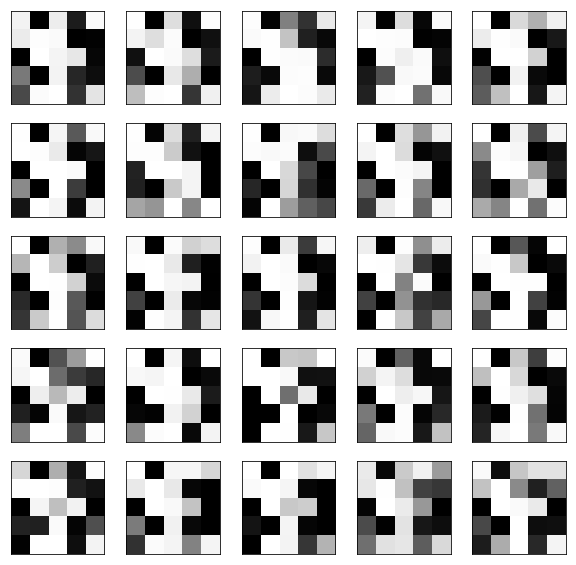

In [12]:
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(a1[i,:].reshape(5,5).T, cmap=plt.cm.binary)